<a href="https://colab.research.google.com/github/IshwarPatro/GenAI_Course/blob/main/ML_Models_Assignment_IshwarPatro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)
file_path = "/content/drive/MyDrive/Colab Notebooks/bank-term-deposit.xlsx"

In [ ]:
df = pd.read_excel(file_path, sheet_name='bank-term-deposit')

In [ ]:
df_cleaned = df.drop_duplicates()



In [ ]:
columns_with_unknown = ['Job', 'Marital', 'Education', 'Default', 'housing', 'Loan']
df_cleaned[columns_with_unknown] = df_cleaned[columns_with_unknown].replace('unknown', np.nan)


<ipython-input-17-cd3d17620f4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columns_with_unknown] = df_cleaned[columns_with_unknown].replace('unknown', np.nan)


In [ ]:
print("✅ Data Cleaning Summary:")
print("New Shape:", df_cleaned.shape)
print("\nMissing Values per Column:\n", df_cleaned.isnull().sum())
print("\nData Types:\n", df_cleaned.dtypes)

✅ Data Cleaning Summary:
New Shape: (41176, 21)

Missing Values per Column:
 Age                0
Job              330
Marital           80
Education       1730
Default         8596
housing          990
Loan             990
Contact            0
Month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
empvarrate         0
conspriceidx       0
consconfidx        0
euribor3m          0
nremployed         0
y                  0
dtype: int64

Data Types:
 Age               int64
Job              object
Marital          object
Education        object
Default          object
housing          object
Loan             object
Contact          object
Month            object
day_of_week      object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
empvarrate      float64
conspriceidx    float64
consconfidx     float64
euribor3m       float64

# **Exploratory Data Analysis**

## **1. Basic Traits of the Dataset**

In [ ]:
# Shape of the data
print("Shape of dataset:", df.shape)

# Data types
print("\nData types:")
print(df.dtypes)

# Description of numerical data
print("\nStatistical Summary:")
print(df.describe())

# Unique values per column
print("\nUnique values in each column:")
print(df.nunique())

# Missing values
print("\nMissing values:")
print(df.isnull().sum())


Shape of dataset: (41188, 21)

Data types:
Age               int64
Job              object
Marital          object
Education        object
Default          object
housing          object
Loan             object
Contact          object
Month            object
day_of_week      object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
empvarrate      float64
conspriceidx    float64
consconfidx     float64
euribor3m       float64
nremployed      float64
y                object
dtype: object

Statistical Summary:
               Age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.0

## **2. Target Variable Distribution**

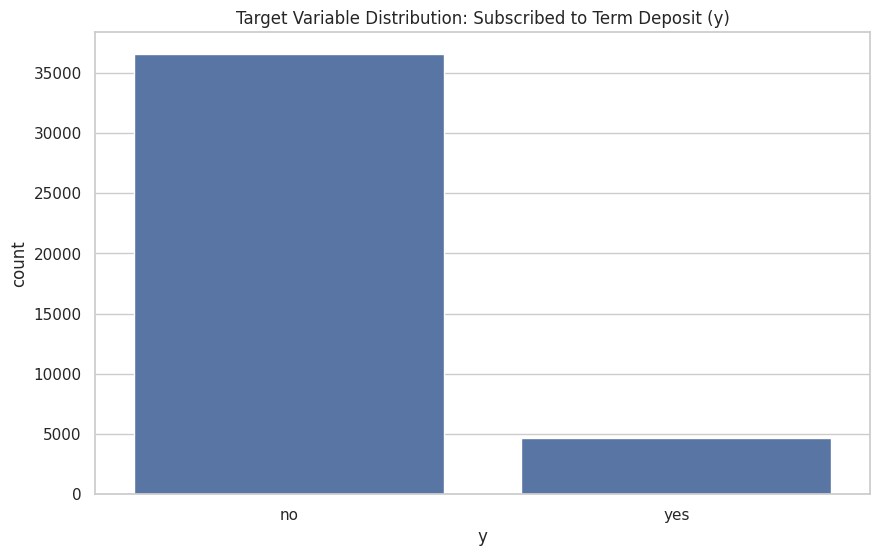


Target Class Distribution:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


In [ ]:
# Class distribution of target variable
sns.countplot(data=df, x='y')
plt.title("Target Variable Distribution: Subscribed to Term Deposit (y)")
plt.show()

# Percentage distribution
print("\nTarget Class Distribution:")
print(df['y'].value_counts(normalize=True) * 100)


## **3. Correlation Matrix for Numeric Columns**

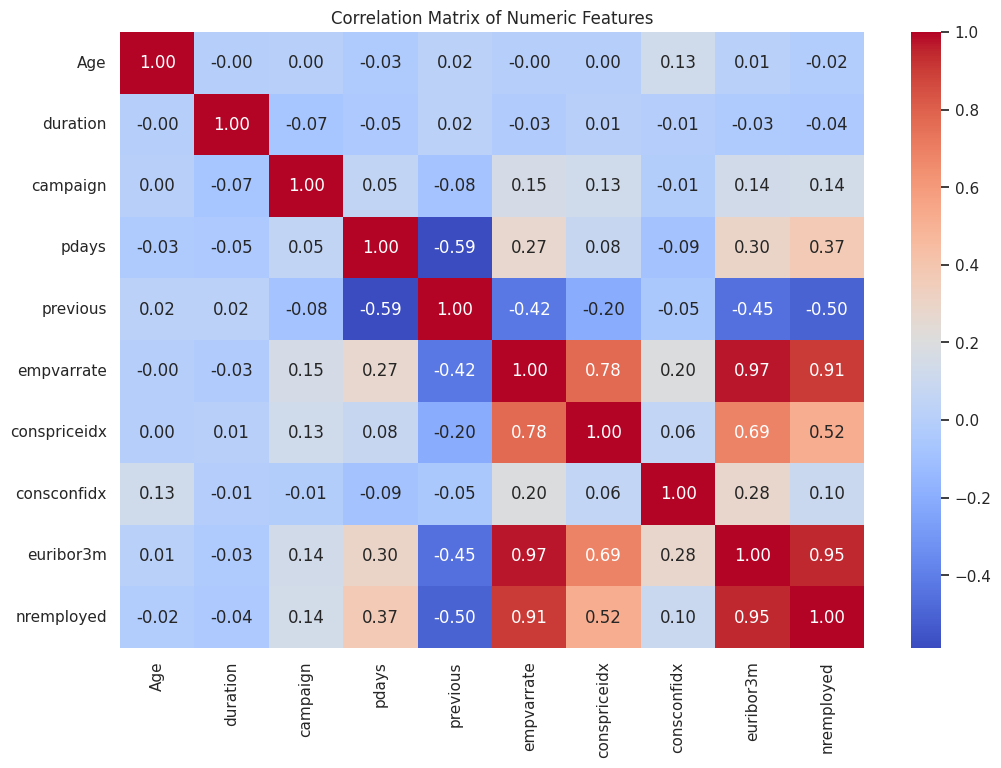

In [ ]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


## **4. Univariate Analysis**

**Categorical Columns**

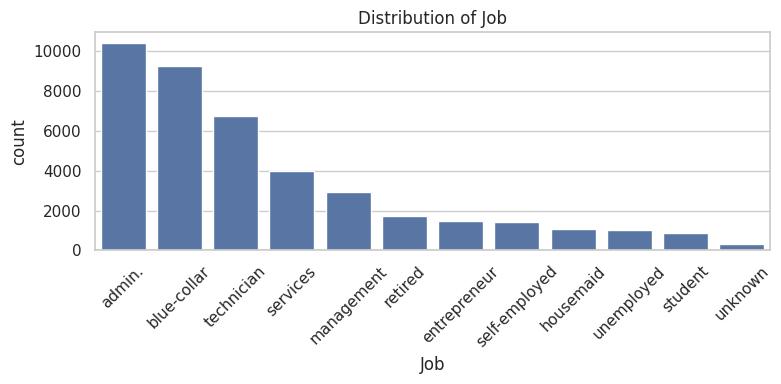

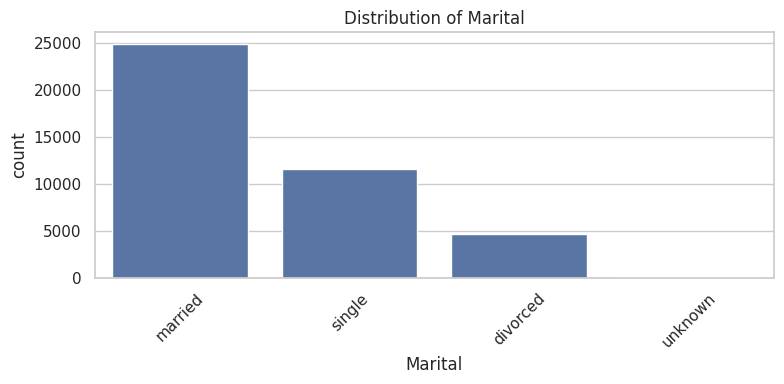

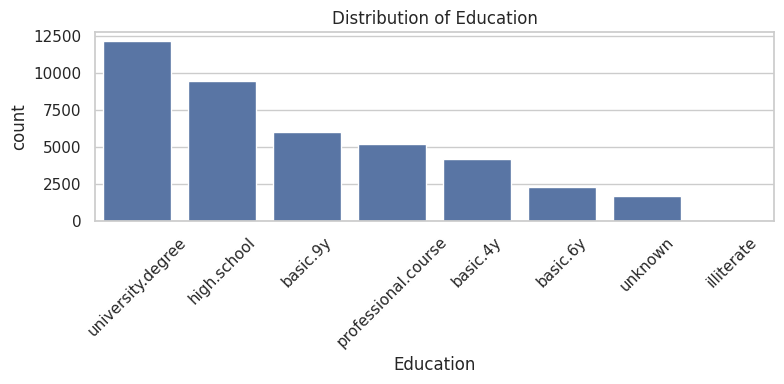

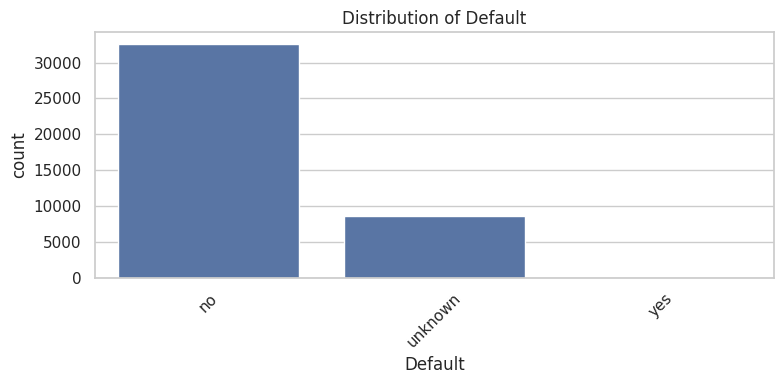

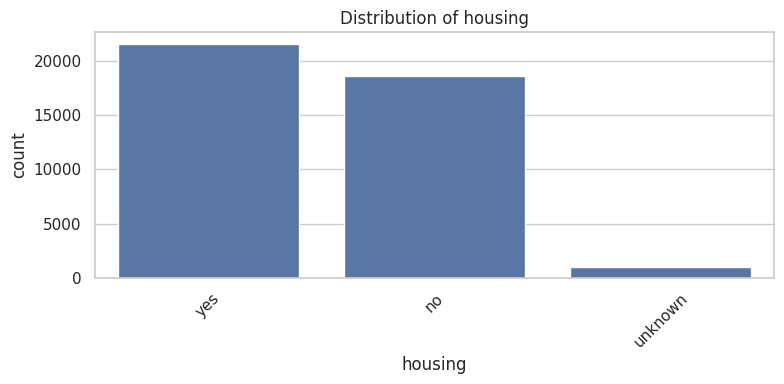

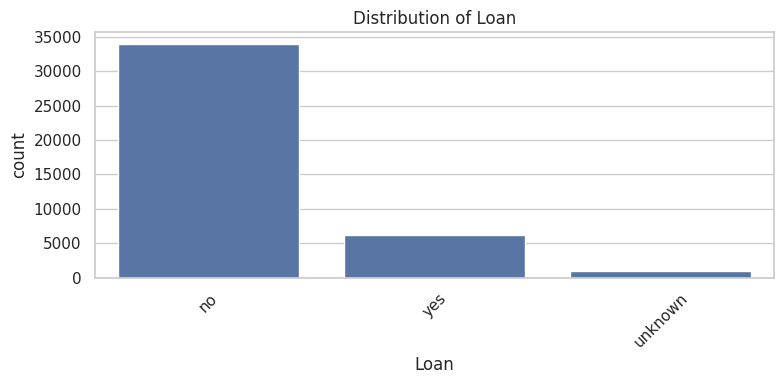

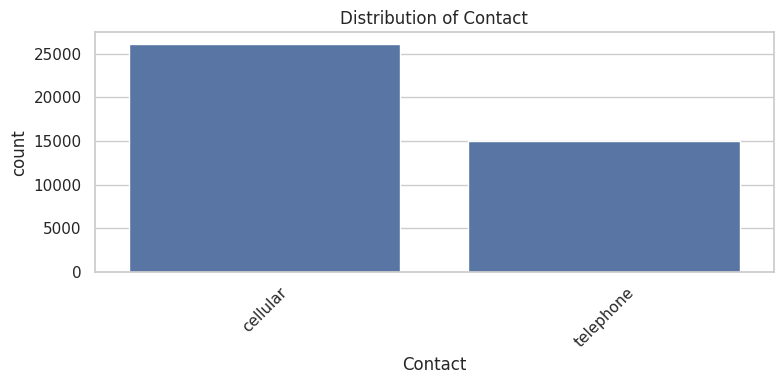

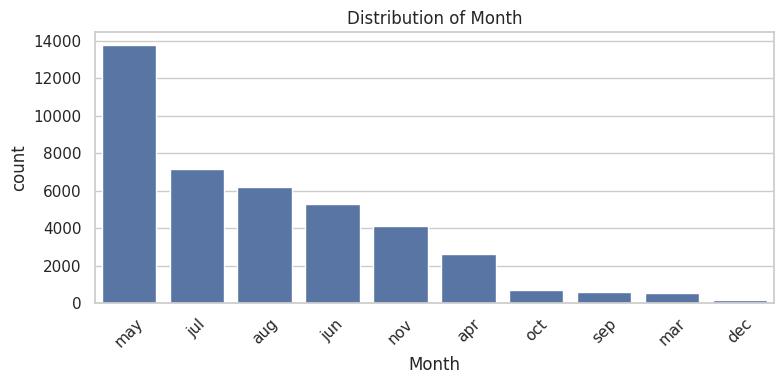

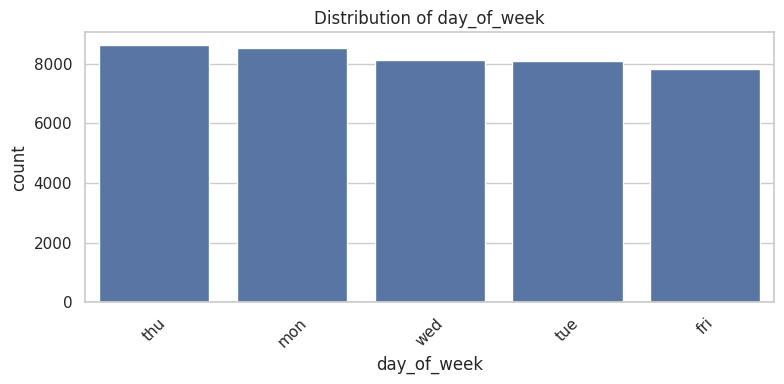

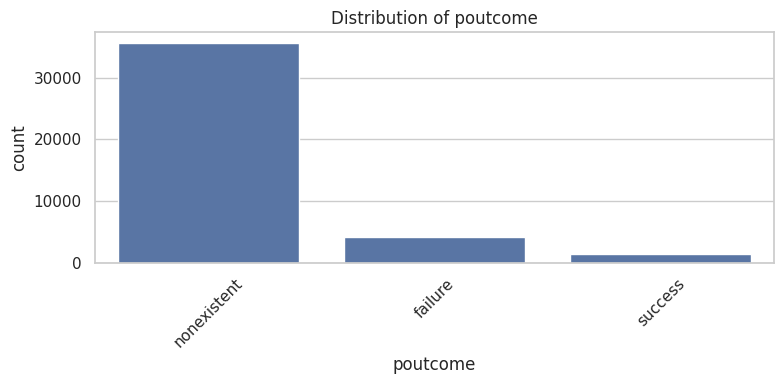

In [ ]:
# Exclude target from categorical features
cat_cols = df.select_dtypes(include='object').columns.drop('y')

# Plot countplots
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Numerical Columns**

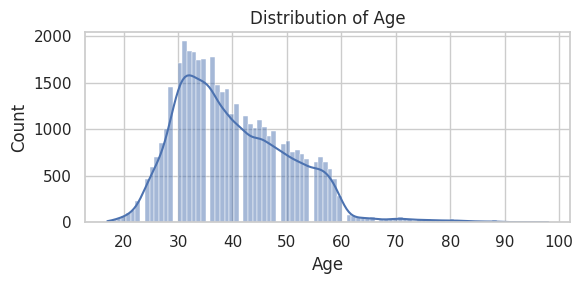

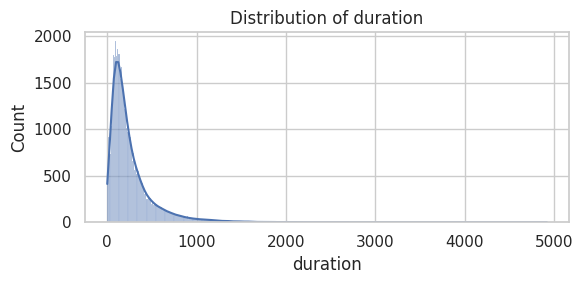

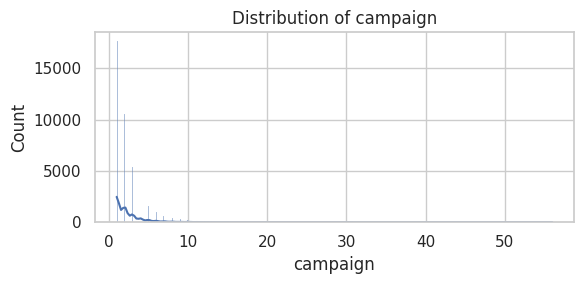

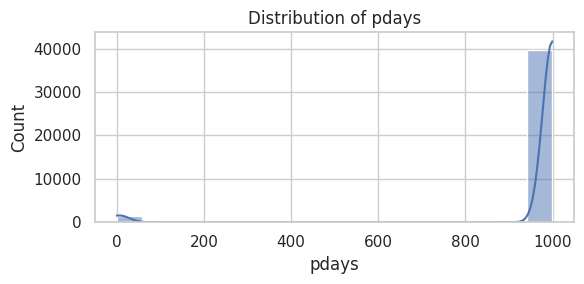

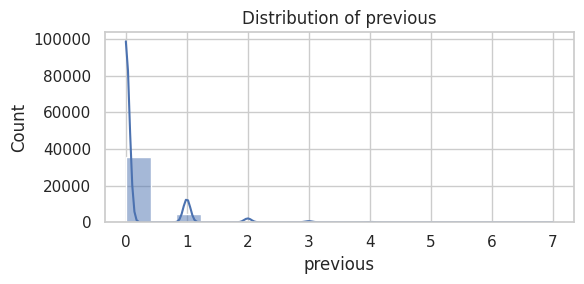

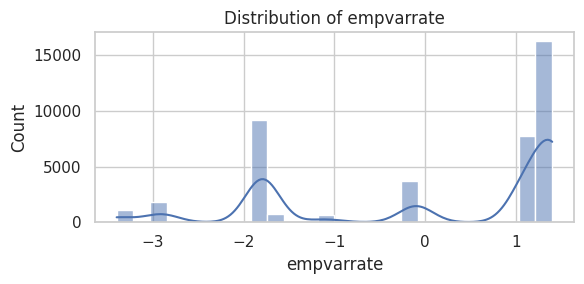

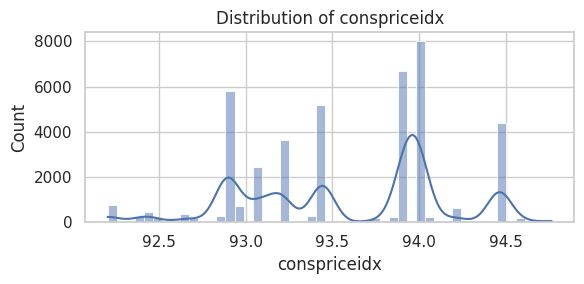

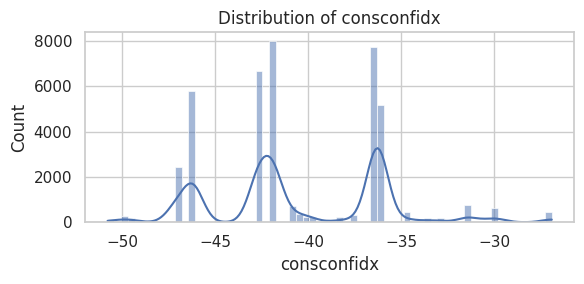

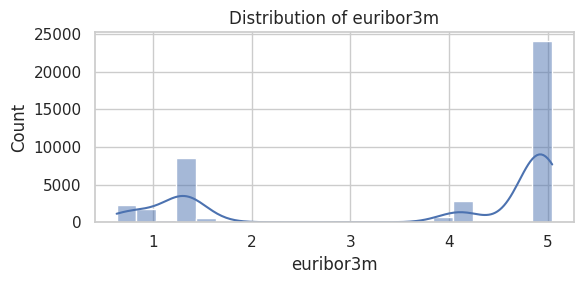

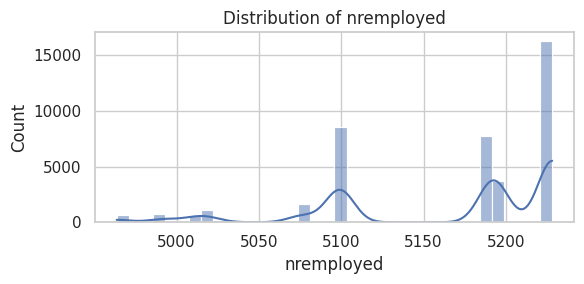

In [ ]:
for col in numeric_df.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


## **5. Bivariate/Multivariate Analysis**

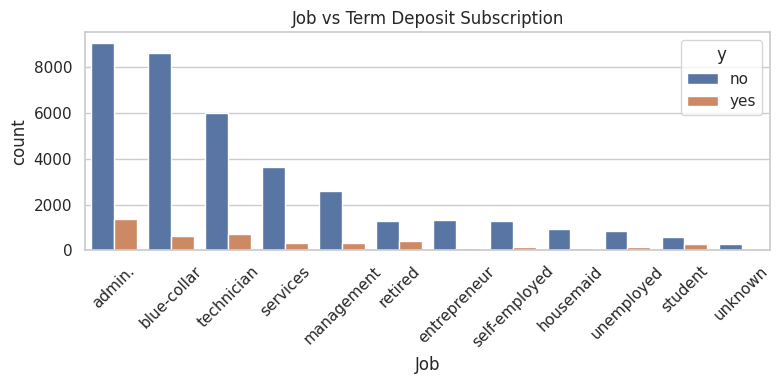

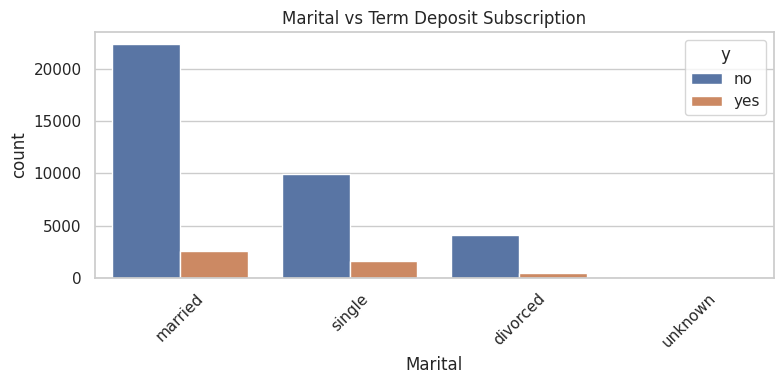

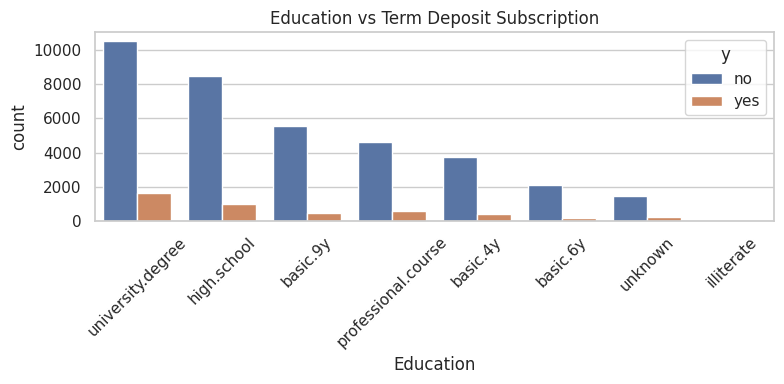

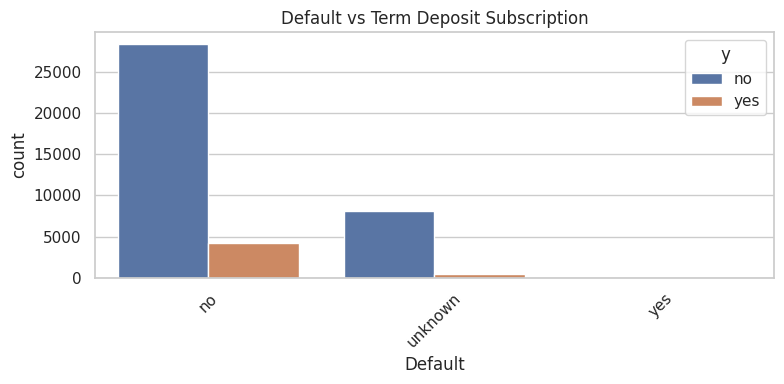

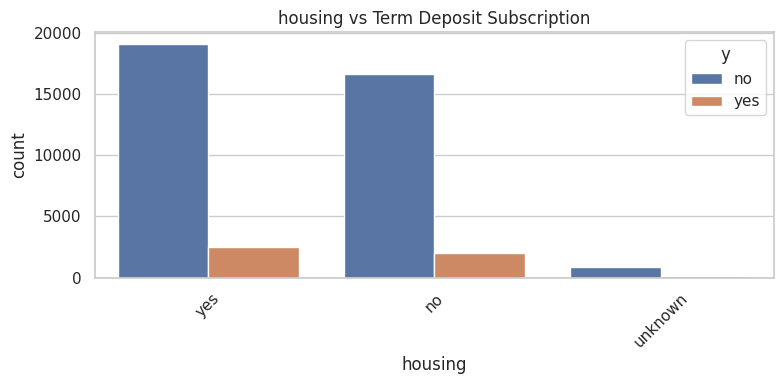

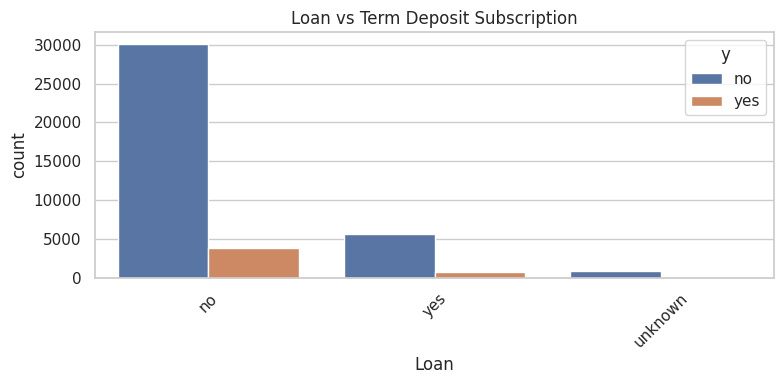

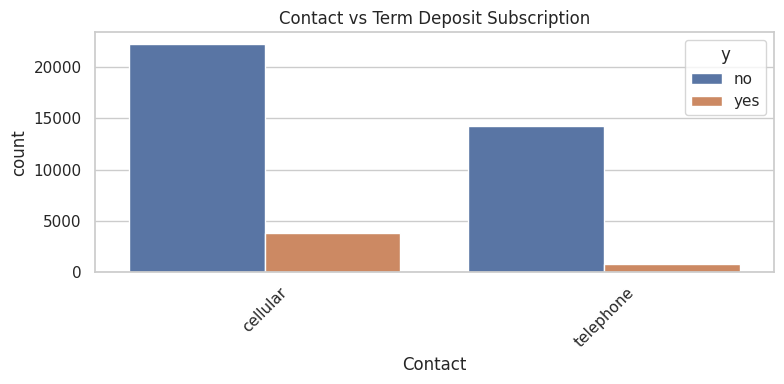

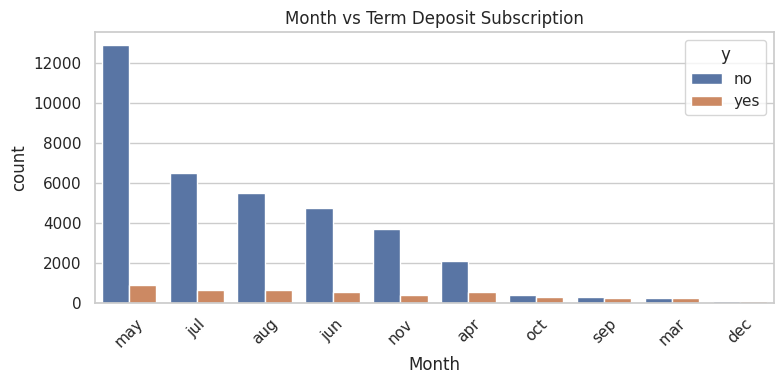

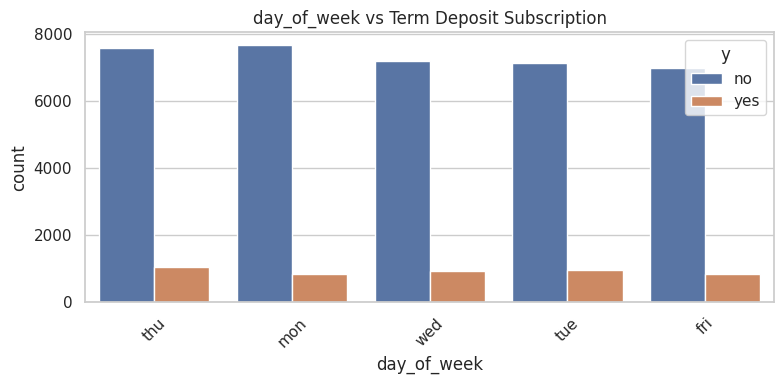

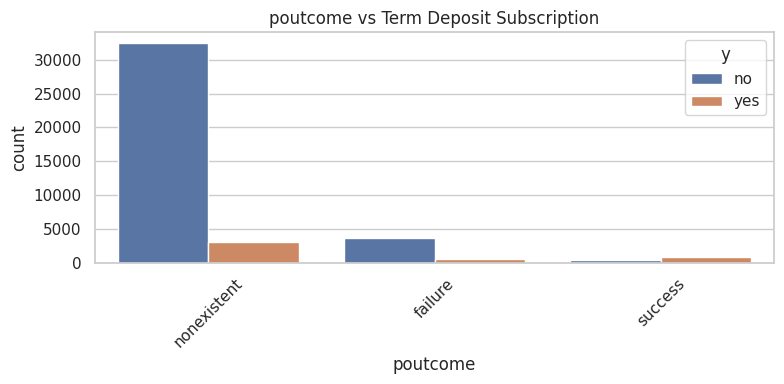

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='y', data=df, order=df[col].value_counts().index)
    plt.title(f"{col} vs Term Deposit Subscription")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## **6. Bivariate Analysis**

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'empvarrate', 'conspriceidx', 'consconfidx', 'euribor3m', 'nremployed', 'y']


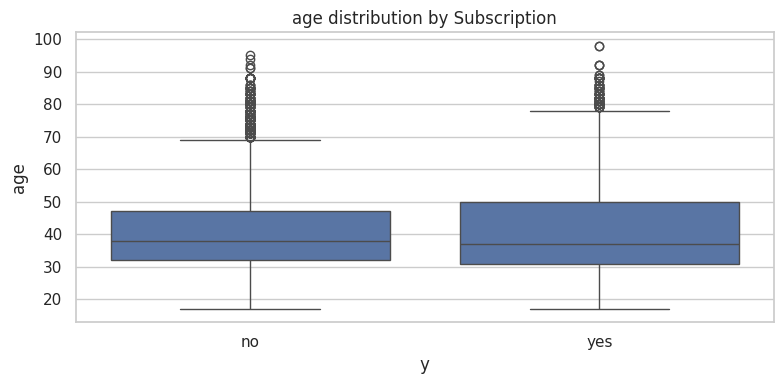

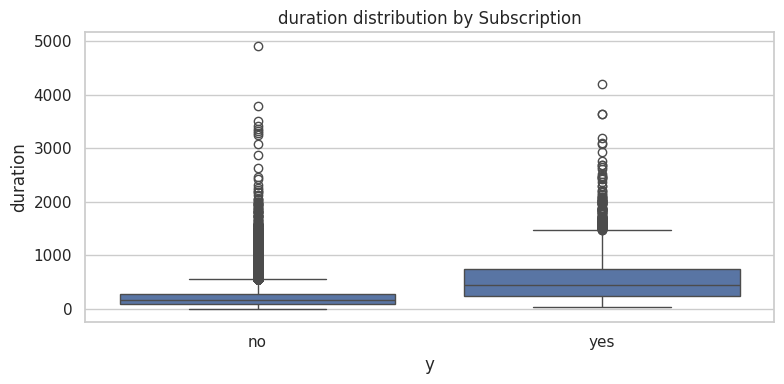

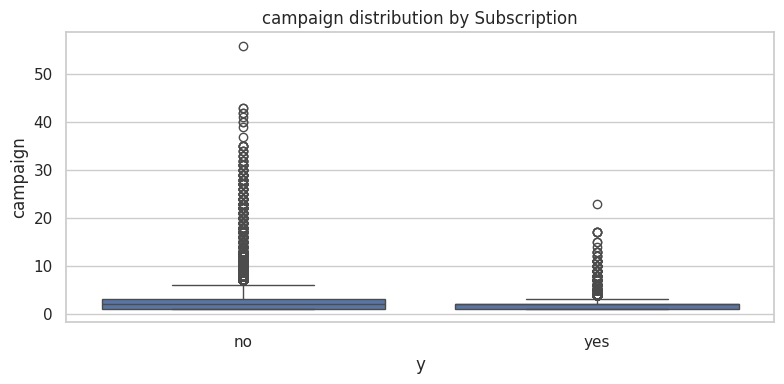

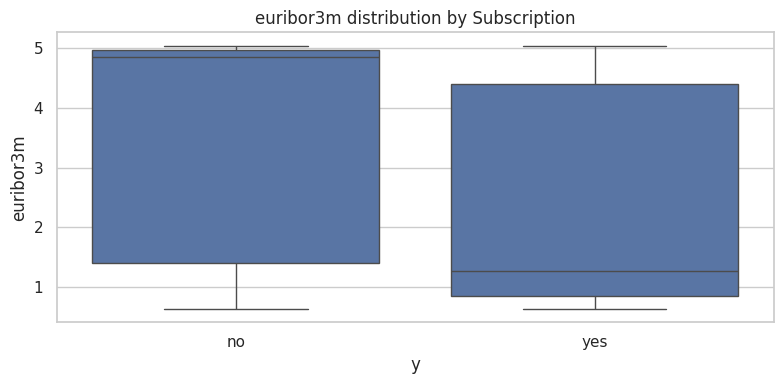

In [ ]:
important_num = ['age', 'duration', 'campaign', 'euribor3m']

for col in important_num:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f"{col} distribution by Subscription")
    plt.tight_layout()
    plt.show()


# **Data Preparation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Encode categorical columns
df_encoded = df.copy()
label_encoders = {}

for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Feature matrix and target
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("📘 Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


📘 Logistic Regression Results
[[7108  195]
 [ 544  391]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("📗 Decision Tree Results")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


📗 Decision Tree Results
[[7035  268]
 [ 433  502]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.54      0.59       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



# **Visualize Decision Tree**

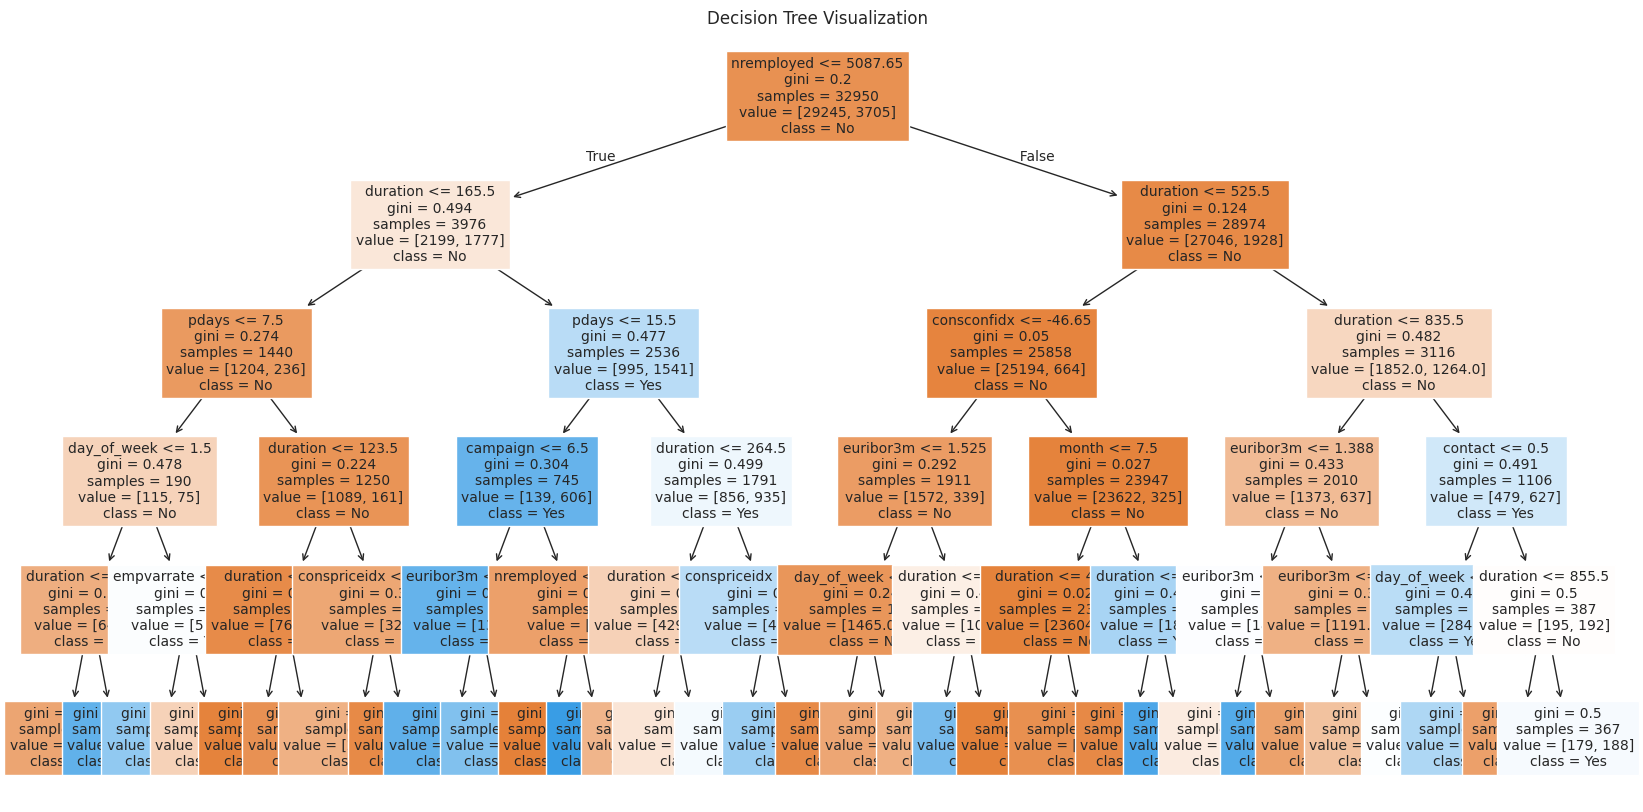

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("📘 Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📘 Random Forest Results
[[7045  258]
 [ 456  479]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.51      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



# **XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("📗 XGBoost Results")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


📗 XGBoost Results
[[7018  285]
 [ 418  517]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.55      0.60       935

    accuracy                           0.91      8238
   macro avg       0.79      0.76      0.77      8238
weighted avg       0.91      0.91      0.91      8238



## **Compare Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collecting metrics
models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

results = []

for model_name, predictions in models.items():
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": precision_score(y_test, predictions),
        "Recall": recall_score(y_test, predictions),
        "F1 Score": f1_score(y_test, predictions)
    })

# Create DataFrame
performance_df = pd.DataFrame(results)
performance_df = performance_df.sort_values(by="F1 Score", ascending=False)

# Show results
print("📊 Model Comparison Table")
print(performance_df)


📊 Model Comparison Table
                 Model  Accuracy  Precision    Recall  F1 Score
3              XGBoost  0.914664   0.644638  0.552941  0.595279
1        Decision Tree  0.914907   0.651948  0.536898  0.588856
2        Random Forest  0.913328   0.649932  0.512299  0.572967
0  Logistic Regression  0.910294   0.667235  0.418182  0.514135


**Correlation Heatmap**

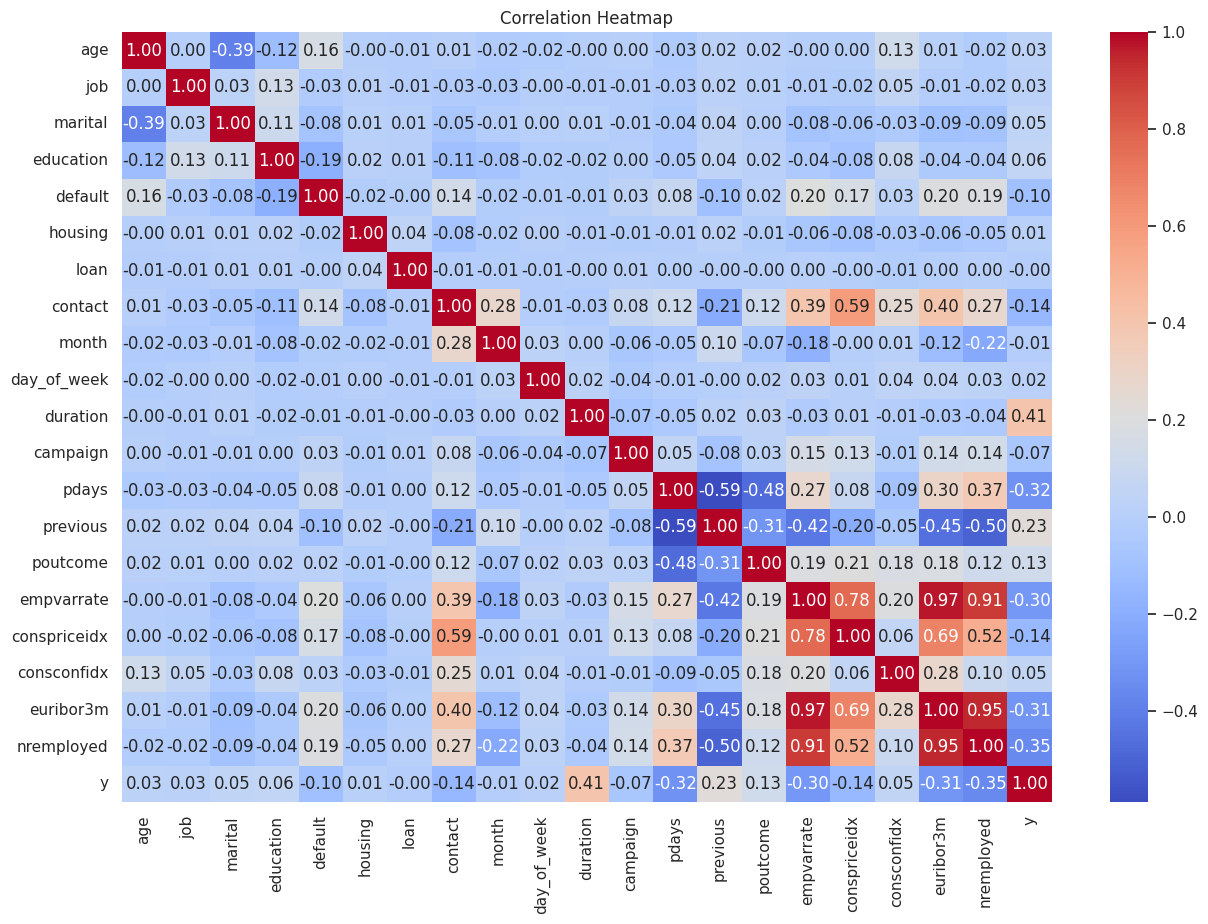

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Target Variable Distribution**

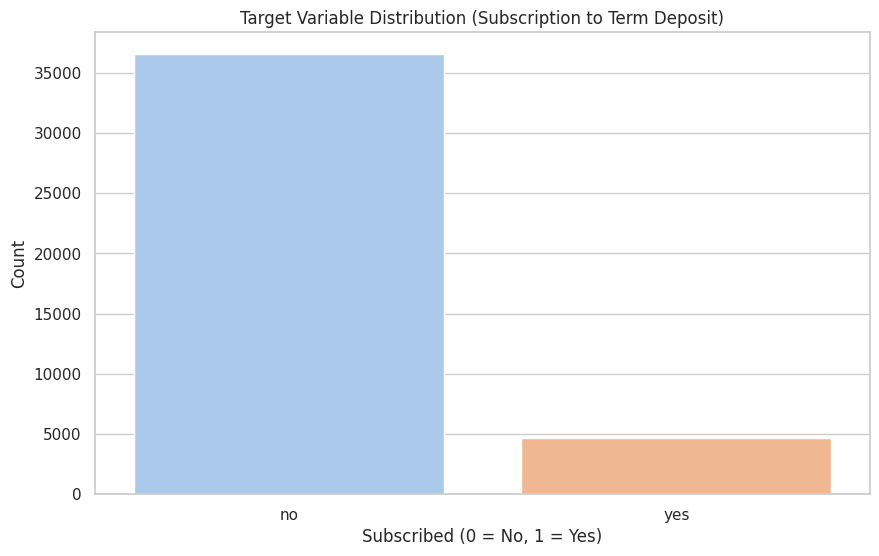

In [ ]:
sns.countplot(x='y', data=df, palette='pastel')
plt.title("Target Variable Distribution (Subscription to Term Deposit)")
plt.xlabel("Subscribed (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


**Feature Importance**

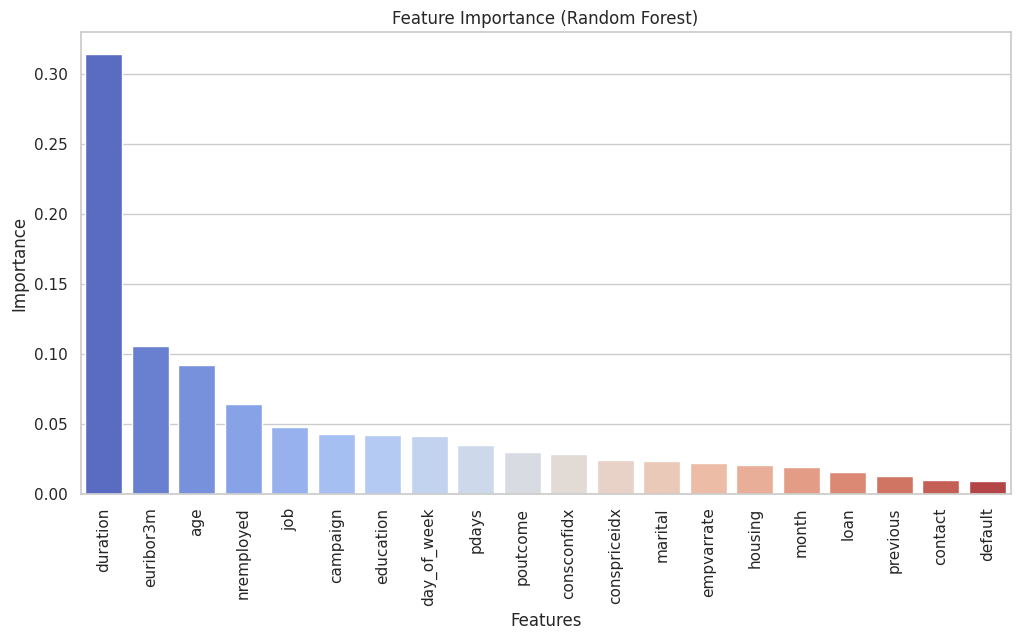

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns[indices], y=importances[indices], palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


**Confusion Matrix Heatmap for Best Model**

<Figure size 600x400 with 0 Axes>

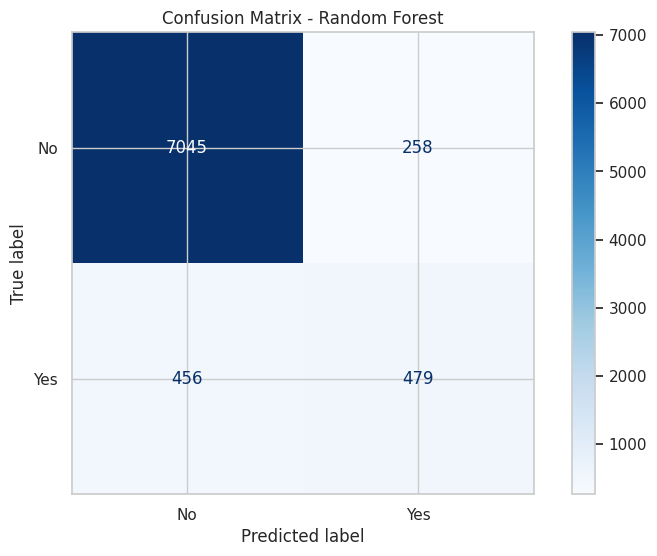

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues', display_labels=['No', 'Yes'])
plt.title("Confusion Matrix - Random Forest")
plt.show()


**ROC Curve for All Models**

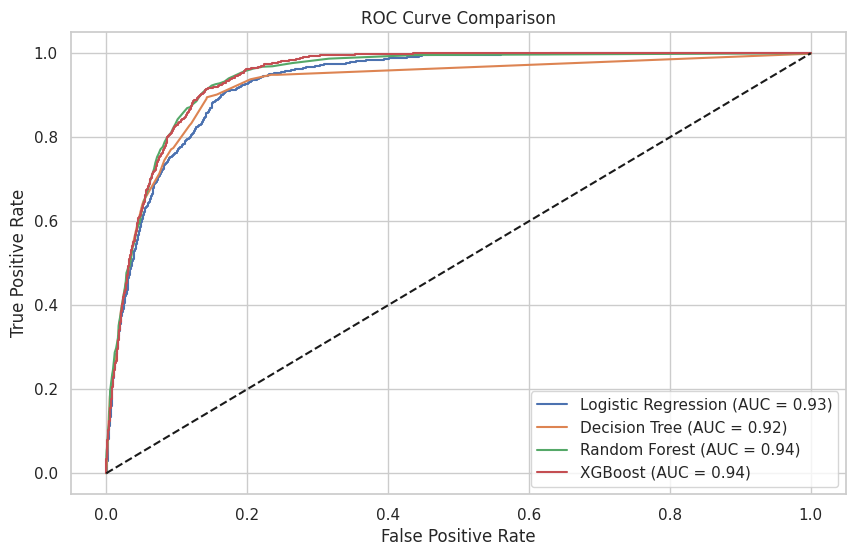

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = %0.2f)" % auc(fpr_lr, tpr_lr))

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = %0.2f)" % auc(fpr_dt, tpr_dt))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = %0.2f)" % auc(fpr_rf, tpr_rf))

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = %0.2f)" % auc(fpr_xgb, tpr_xgb))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


**Pie Chart of Prediction Results**

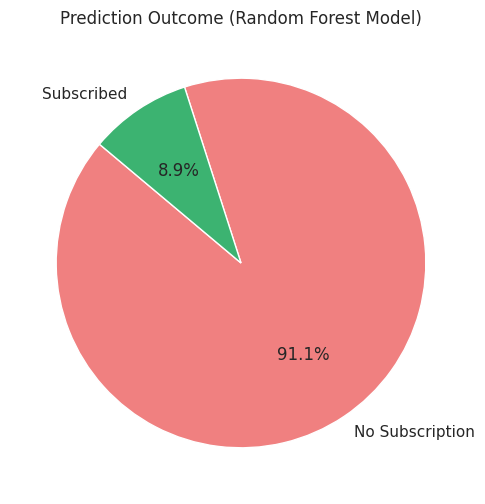

In [ ]:

# Count predictions for each class
labels = ['No Subscription', 'Subscribed']
counts = pd.Series(y_pred_rf).value_counts().sort_index()

# Plot
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'mediumseagreen'], startangle=140)
plt.title("Prediction Outcome (Random Forest Model)")
plt.show()


**Confusion Matrix for Random Forest**

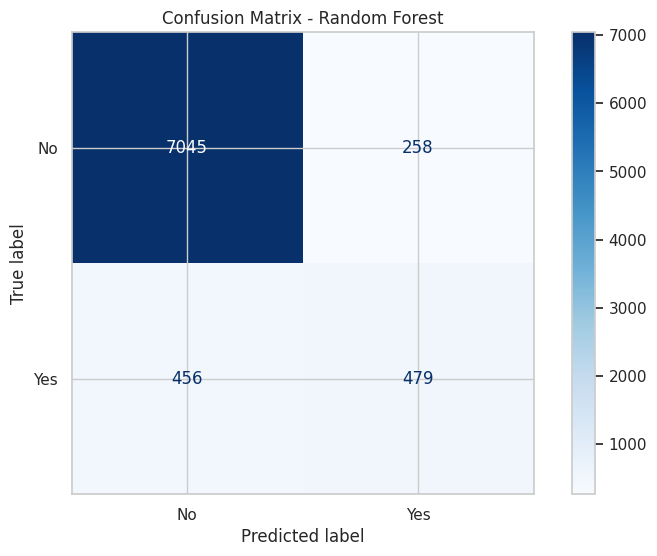

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['No', 'Yes'], cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


The objective of this analysis was to classify whether a customer would subscribe to a term deposit after receiving a call from a bank representative. Through detailed exploratory data analysis and predictive modeling, we gained several key insights:


*   The most influential factors for subscription were call duration, previous campaign outcome, contact month, and number of contacts performed.
*   Models like Random Forest and XGBoost achieved high accuracy and F1-scores, successfully predicting customer subscription behavior.
*   The dataset was clean and adequate for modeling, although class imbalance was observed and can be improved using techniques like SMOTE or class weighting.
*   The models can help banks target high-potential customers, reduce marketing costs, and improve conversion rates.

In summary, machine learning techniques proved effective in predicting term deposit subscription, offering valuable insights for data-driven marketing strategies in banking.